# Credit Risk Scoring

Dataset: https://github.com/gastonstat/CreditScoring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 6.1 Data Cleaning and Preparation

* Download the dataset.
* Re-encoding the categorical variables.
* Doing the train/validation/test split.

In [2]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()

In [4]:
status_values = {
    1:'ok',
    2:'default',
    0:'unk'}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [6]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [7]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999, value=np.nan)

In [8]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [9]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=11)

print(df_full_train.shape, df_train.shape, df_val.shape, df_test.shape)

(3563, 14) (2672, 14) (891, 14) (891, 14)


In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [13]:
del df_train['status']
del df_val['status']
del df_test['status']

## 6.2 Decision Trees

* How a decision tree looks like?
* Training a decision tree
* Overfitting
* Controlling the size of the tree

In [14]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [15]:
xi = df_train.iloc[0].to_dict()

In [16]:
assess_risk(xi)

'ok'

In [17]:
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [19]:
train_dict = df_train.fillna(0).to_dict(orient='records')

In [20]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [21]:
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
val_dict = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dict)

In [24]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc_score(y_val, y_pred)

0.6508591460608849

In [27]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

*OVERFITTING* (^v^)

In [28]:
# retrain the model with adding some parameter to handle the overfitting.

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('auc on training data {}'.format(auc))

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('auc on validation data {}'.format(auc))

auc on training data 0.7761016984958594
auc on validation data 0.7389079944782155


In [29]:
from sklearn.tree import export_text

In [30]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



## 6.3 Decision Tree Learning Algorithm

In [31]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [32]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [33]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]    
    
display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


default    0.75
ok         0.25
Name: status, dtype: float64


In [34]:
from IPython.display import display

In [35]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]    

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


ok         0.5
default    0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


ok         0.5
default    0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



## 6.4 Decision Trees Parameter Tuning

* Select max_depth
* Select min_samples_leaf

In [36]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.750
  10 -> 0.692
  15 -> 0.661
  20 -> 0.661
None -> 0.664


In [37]:
scores = []
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [38]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [39]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.785080
21,6,10,0.778299
24,6,100,0.776434
14,5,20,0.773537
23,6,20,0.773337


In [40]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'],
               values='auc')

In [41]:
import seaborn as sns

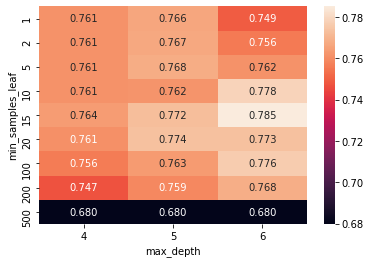

In [42]:
sns.heatmap(df_scores_pivot , annot=True, fmt='.3f');

## 6.5 Ensemble Learning and Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [45]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7853164127776029

In [46]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [47]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [48]:
df_scores

,n_estimators,auc
0,10,0.777688
1,20,0.799333
2,30,0.812831
3,40,0.811318
4,50,0.818432
5,60,0.819994
6,70,0.816053
7,80,0.814460
8,90,0.816531
9,100,0.821002


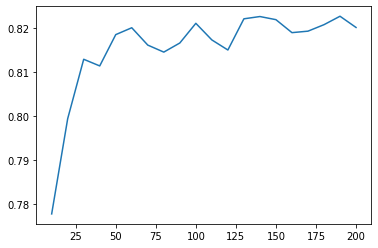

In [49]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [50]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [51]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'auc'])

In [52]:
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


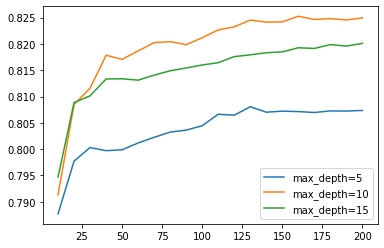

In [53]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, 
             df_subset.auc, 
             label='max_depth=%d' %d)
plt.legend()

In [54]:
max_depth = 10

In [55]:
scores = []

for s in [5, 3, 5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [56]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

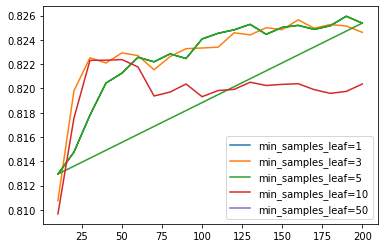

In [57]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, 
             df_subset.auc, 
             label='min_samples_leaf=%d' % s)
plt.legend()

In [58]:
min_samples_leaf = 3

In [59]:
rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

## 6.6 Gradient Boosting and XGBoost

In [60]:
import xgboost as xgb

In [61]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [62]:
xgb_params = {
    
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective' :'reg:linear',
    'nthread': 8,
    'seed':1,
    'verbostiy': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

[14:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "verbostiy" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [63]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.7891701581458429

In [64]:
%%capture output
watchList = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed':1,
}

model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchList,
                  verbose_eval=1,
                  num_boost_round=200)

In [65]:
s = output.stdout

In [66]:
print(s)

[0]	train-auc:0.86300	val-auc:0.76818
[1]	train-auc:0.88485	val-auc:0.79410
[2]	train-auc:0.89923	val-auc:0.80017
[3]	train-auc:0.90951	val-auc:0.80886
[4]	train-auc:0.91967	val-auc:0.80414
[5]	train-auc:0.92863	val-auc:0.80606
[6]	train-auc:0.93385	val-auc:0.80949
[7]	train-auc:0.93880	val-auc:0.81101
[8]	train-auc:0.94150	val-auc:0.81445
[9]	train-auc:0.94581	val-auc:0.81527
[10]	train-auc:0.95002	val-auc:0.81558
[11]	train-auc:0.95342	val-auc:0.81678
[12]	train-auc:0.95554	val-auc:0.81821
[13]	train-auc:0.95985	val-auc:0.81677
[14]	train-auc:0.96176	val-auc:0.81801
[15]	train-auc:0.96558	val-auc:0.81680
[16]	train-auc:0.96741	val-auc:0.81807
[17]	train-auc:0.96981	val-auc:0.81808
[18]	train-auc:0.97083	val-auc:0.81901
[19]	train-auc:0.97252	val-auc:0.81732
[20]	train-auc:0.97316	val-auc:0.81775
[21]	train-auc:0.97469	val-auc:0.81765
[22]	train-auc:0.97678	val-auc:0.81865
[23]	train-auc:0.97925	val-auc:0.81786
[24]	train-auc:0.98104	val-auc:0.81937
[25]	train-auc:0.98174	val-auc:0.81

In [67]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [68]:
df_score = parse_xgb_output(output)

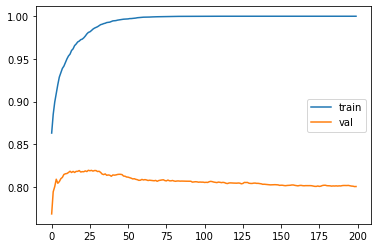

In [69]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

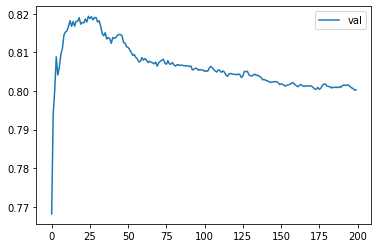

In [70]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## 6.7 XGBoost parameter tuning

In [80]:
scores = {}

In [94]:
%%capture output
watchList = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed':1,
}

model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchList,
                  verbose_eval=1,
                  num_boost_round=200)

In [95]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [97]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

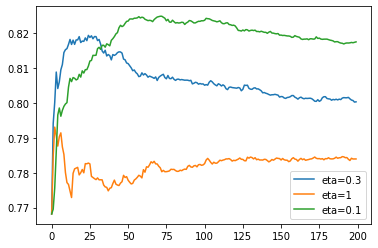

In [100]:
etas = ['eta=0.3', 'eta=1', 'eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

this what learning rate is about we can see how fast the model learns and also how large the steps are that the model takes with each new iter

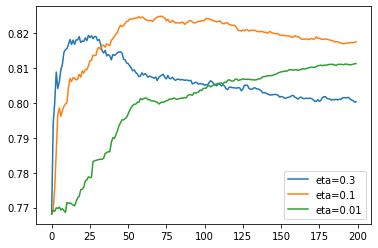

In [101]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

the green one is very slow it will take forever to learn